In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
df = pd.read_csv("Housing.csv")
df.head()
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [19]:
data = pd.DataFrame({'x': x, 'y': y})

In [20]:
print(data.isnull().sum())

x    0
y    0
dtype: int64


In [21]:
X = data[['x']]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.5054260531542909
Mean Squared Error (MSE): 0.34998202662484107
R-squared (R²): 0.7118371517892593


In [25]:
highest_price = df['price'].max()
lowest_price = df['price'].min()

print("Highest price:", highest_price)
print("Lowest price:", lowest_price)

Highest price: 13300000
Lowest price: 1750000


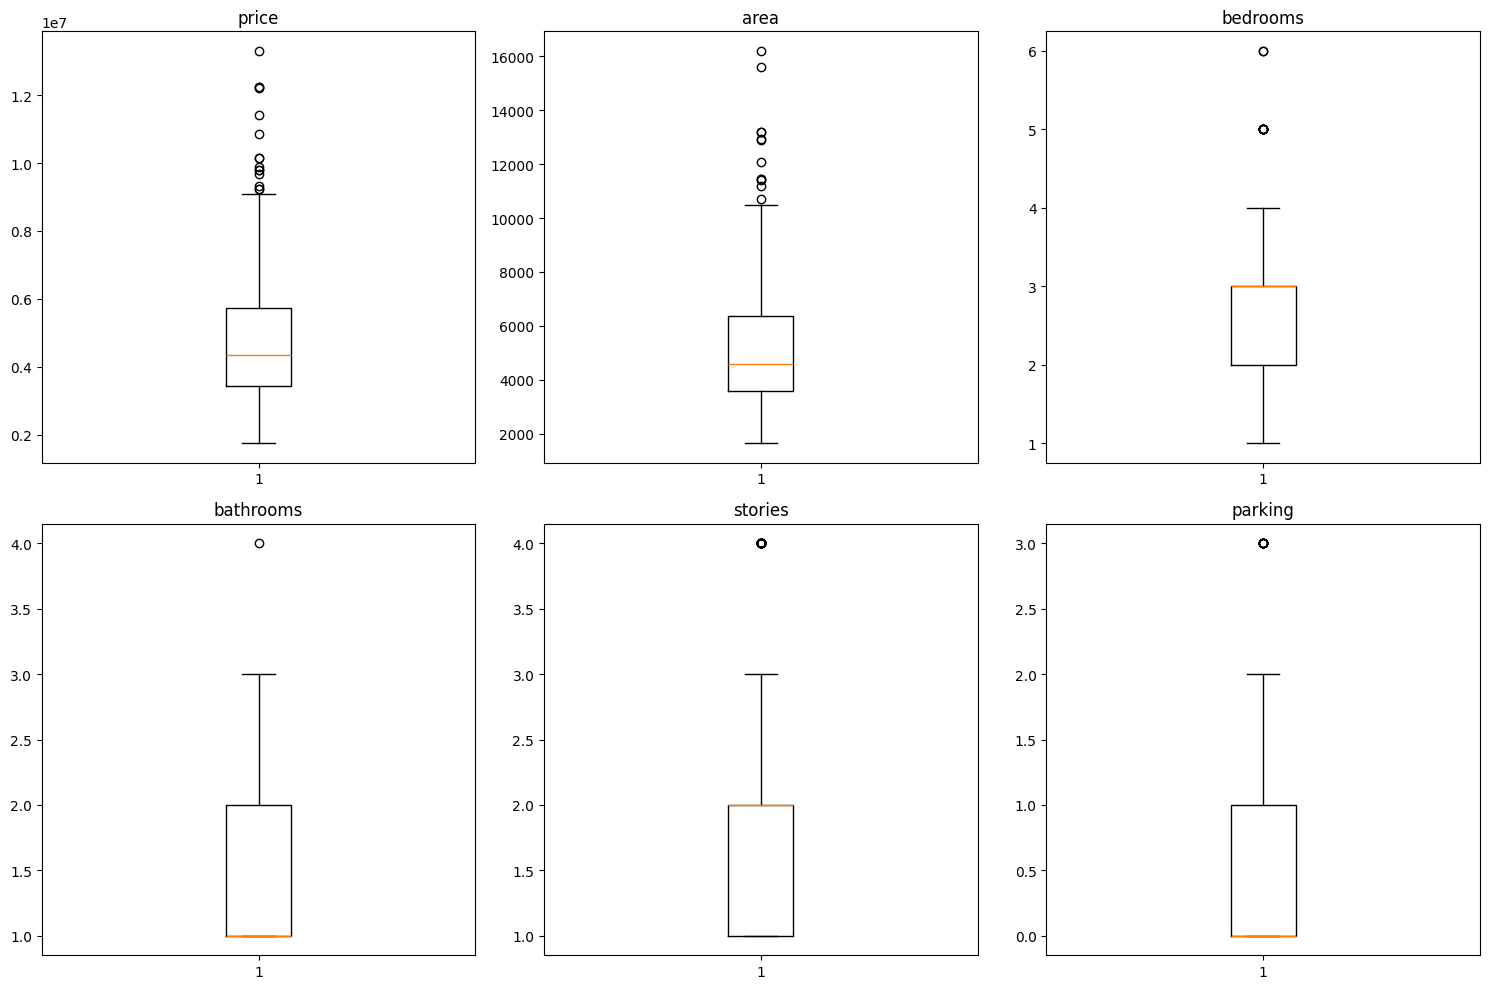

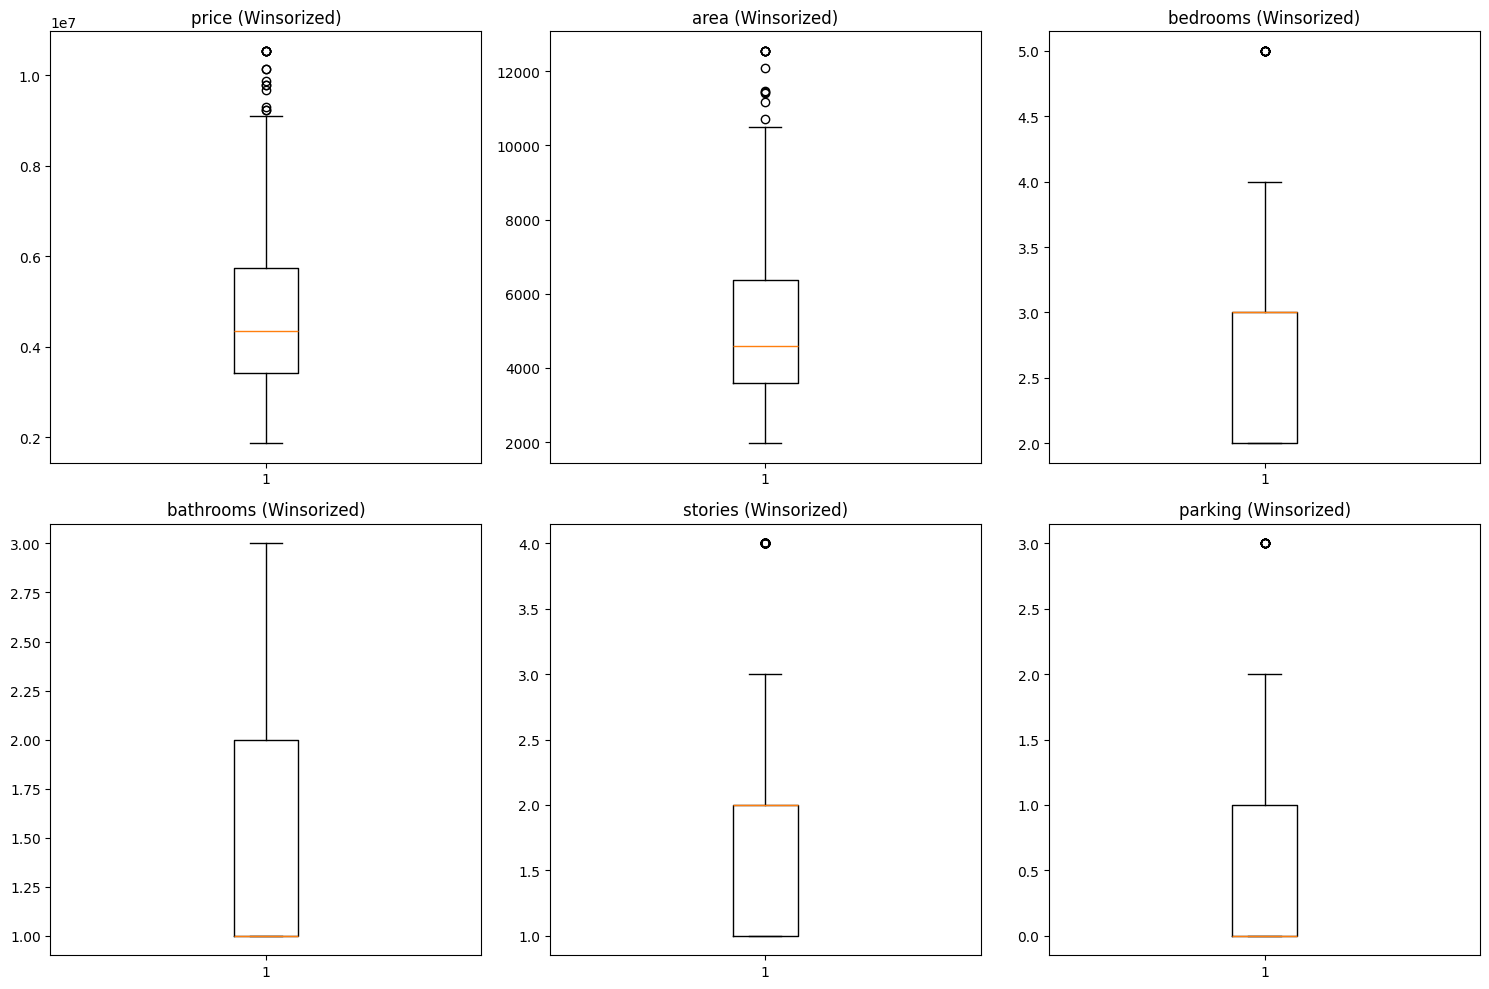

In [26]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


for col in numerical_cols:
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(f'{col} (Winsorized)')
plt.tight_layout()
plt.show()

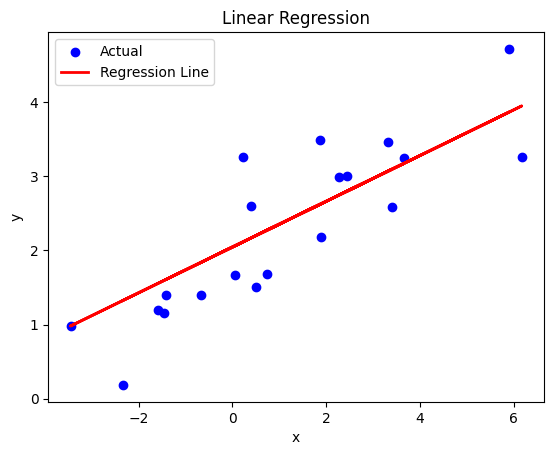

Intercept: 2.0446014316823637
Coefficient (slope): 0.3081128781793846


In [29]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (slope): {model.coef_[0]}")

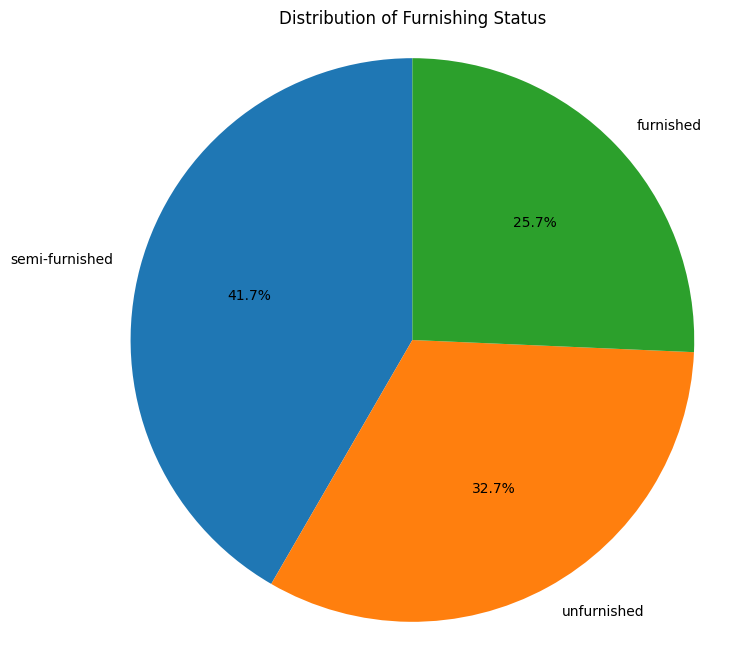

In [30]:
import matplotlib.pyplot as plt


furnishing_counts = df['furnishingstatus'].value_counts()
furnishing_labels = furnishing_counts.index.tolist()
furnishing_sizes = furnishing_counts.values.tolist()

plt.figure(figsize=(8, 8))
plt.pie(furnishing_sizes, labels=furnishing_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Furnishing Status')
plt.axis('equal')
plt.show()

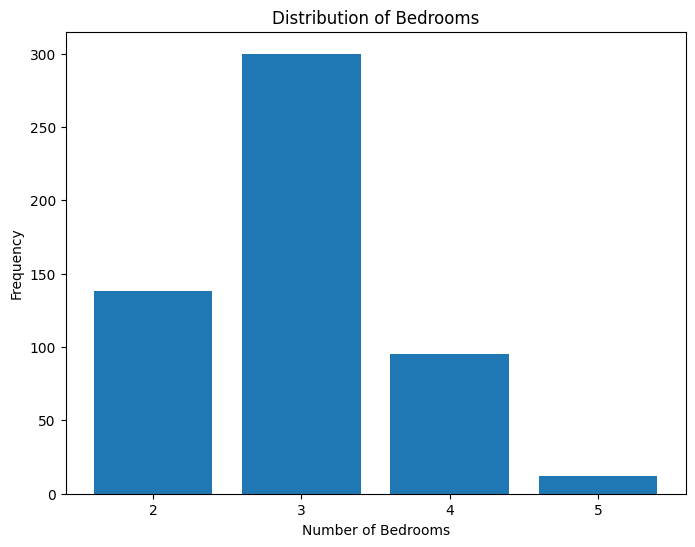

In [31]:
import matplotlib.pyplot as plt
bedroom_counts = df['bedrooms'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(bedroom_counts.index, bedroom_counts.values)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Bedrooms')
plt.xticks(bedroom_counts.index)
plt.show()

Mean Absolute Error (MAE): 1431208.2840989644
Mean Squared Error (MSE): 3203735387337.437
R-squared (R²): 0.2869431572671757


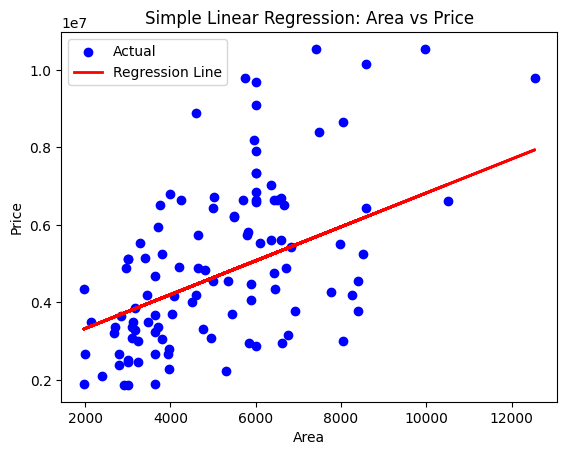

Intercept: 2449785.678529122
Coefficient (slope): 437.4661864111769


In [32]:
X = df[['area']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()

print(f"Intercept: {model.intercept_}")
print(f"Coefficient (slope): {model.coef_[0]}")

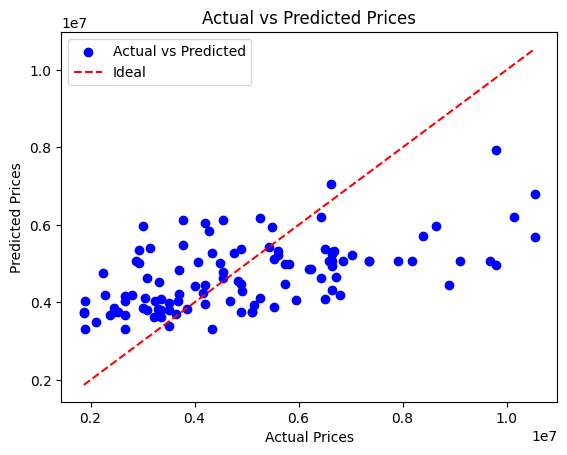

In [33]:
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()